In [1]:
import numpy as np
import pandas as pd
from scipy.stats import rankdata
from cryptoaml.utils import read_pickle
from Orange.evaluation.scoring import compute_CD
from Orange.evaluation.scoring import graph_ranks

,score,model,dataset_name,ranks
332,0.975342,T_light_boost,AF_35,1.0
392,0.970027,T_cat_boost,AF_35,2.0
272,0.969697,T_xg_boost,AF_35,3.0
30,0.960712,random_forest,AF_35,4.0
273,0.985075,T_xg_boost,AF_36,1.0
...,...,...,...,...
390,0.000000,T_cat_boost,LF_NE_48,2.5
29,0.027099,random_forest,LF_NE_49,1.0
271,0.000000,T_xg_boost,LF_NE_49,3.0
331,0.000000,T_light_boost,LF_NE_49,3.0


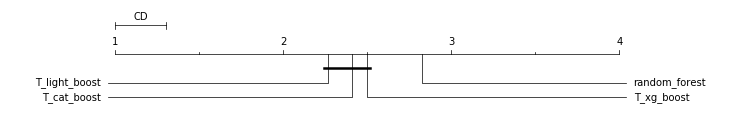

In [32]:
model_results = []


exp_1_elliptic_random_forest = read_pickle("persistence/experiment_1/results/benchmark_model_results.pkl")


exp_1_elliptic_gbm_tuned = read_pickle("persistence/experiment_1/results/tuned_models_results.pkl")
exp_1_elliptic_gbm_default = read_pickle("persistence/experiment_1/results/defaults_models_results.pkl")

exp_1_noaa_gbm_tuned = read_pickle("persistence/experiment_1.2/results/tuned_models_results.pkl")
exp_1_noaa_gbm_default = read_pickle("persistence/experiment_1.2/results/defaults_models_results.pkl")
exp_1_noaa_random_forest = read_pickle("persistence/experiment_1.2/results/benchmark_model_results.pkl")


for model in exp_1_elliptic_random_forest:
    for fset in exp_1_elliptic_random_forest[model]:

        tmp_data = exp_1_elliptic_random_forest[model][fset]["time_metrics"].copy()
        tmp_data["model"] = model 
        tmp_data["dataset_name"] = fset + "_" + tmp_data["timestep"].astype(str)
        tmp_data.drop(columns=["timestep", "total_pos_label"], inplace=True)
        model_results = model_results + tmp_data.to_dict(orient='records')
        

for model in exp_1_noaa_random_forest:
    for fset in exp_1_noaa_random_forest[model]:
        tmp_data = exp_1_noaa_random_forest[model][fset]["time_metrics"].copy()
        tmp_data["model"] = model 
        tmp_data["dataset_name"] = fset + "_" + tmp_data["timestep"].astype(str)
        tmp_data.drop(columns=["timestep", "total_pos_label"], inplace=True)
        model_results = model_results + tmp_data.to_dict(orient='records')

        
        
for model in exp_1_elliptic_gbm_tuned:
    for fset in exp_1_elliptic_gbm_tuned[model]:

        tmp_data = exp_1_elliptic_gbm_tuned[model][fset]["time_metrics"].copy()
        tmp_data["model"] = "T_" + model 
        tmp_data["dataset_name"] = fset + "_" + tmp_data["timestep"].astype(str)
        tmp_data.drop(columns=["timestep", "total_pos_label"], inplace=True)
        model_results = model_results + tmp_data.to_dict(orient='records')

for model in exp_1_noaa_gbm_tuned:
    for fset in exp_1_noaa_gbm_tuned[model]:
        tmp_data = exp_1_noaa_gbm_tuned[model][fset]["time_metrics"].copy()
        tmp_data["model"] = "T_" + model 
        tmp_data["dataset_name"] = fset + "_" + tmp_data["timestep"].astype(str)
        tmp_data.drop(columns=["timestep", "total_pos_label"], inplace=True)
        model_results = model_results + tmp_data.to_dict(orient='records')

        
        
# for model in exp_1_noaa_gbm_tuned:
#     for fset in exp_1_noaa_gbm_tuned[model]:
#         if fset == "LF":
#             continue 
#         tmp_data = exp_1_noaa_gbm_tuned[model][fset]["time_metrics"].copy()
#         tmp_data["model"] = "T_" + model 
#         tmp_data["dataset_name"] = fset + "_" + tmp_data["timestep"].astype(str)
#         tmp_data.drop(columns=["timestep", "total_pos_label"], inplace=True)
#         model_results = model_results + tmp_data.to_dict(orient='records')



# for model in exp_1_noaa_gbm_default:
#     for fset in exp_1_noaa_gbm_default[model]:
#         tmp_data = exp_1_noaa_gbm_default[model][fset]["time_metrics"].copy()
#         tmp_data["model"] = model 
#         tmp_data["dataset_name"] = fset + "_" + tmp_data["timestep"].astype(str)
#         tmp_data.drop(columns=["timestep", "total_pos_label"], inplace=True)
#         model_results = model_results + tmp_data.to_dict(orient='records')

# for model in exp_1_elliptic_gbm_default:
#     for fset in exp_1_elliptic_gbm_default[model]:
#         tmp_data = exp_1_elliptic_gbm_default[model][fset]["time_metrics"].copy()
#         tmp_data["model"] = model 
#         tmp_data["dataset_name"] = fset + "_" + tmp_data["timestep"].astype(str)
#         tmp_data.drop(columns=["timestep", "total_pos_label"], inplace=True)
#         model_results = model_results + tmp_data.to_dict(orient='records')

        
# for model in exp_1_noaa_gbm_tuned:
#     for fset in exp_1_noaa_gbm_tuned[model]:
#         tmp_data = exp_1_noaa_gbm_tuned[model][fset]["time_metrics"].copy()
#         tmp_data["model"] = "T_" + model 
#         tmp_data["dataset_name"] = fset + "_" + tmp_data["timestep"].astype(str)
#         tmp_data.drop(columns=["timestep", "total_pos_label"], inplace=True)
#         model_results = model_results + tmp_data.to_dict(orient='records')

        
# for model in exp_1_elliptic_gbm_tuned:
#     for fset in exp_1_elliptic_gbm_tuned[model]:
#         tmp_data = exp_1_elliptic_gbm_tuned[model][fset]["time_metrics"].copy()
#         tmp_data["model"] = "T_" + model 
#         tmp_data["dataset_name"] = fset + "_" + tmp_data["timestep"].astype(str)
#         tmp_data.drop(columns=["timestep", "total_pos_label"], inplace=True)
#         model_results = model_results + tmp_data.to_dict(orient='records')

model_results_df = pd.DataFrame(data=model_results)
model_results_df = pd.DataFrame(data=model_results)
lst = model_results_df.groupby('dataset_name')['score'].apply(pd.Series.tolist).tolist()
ranks = [rankdata(row, method="average") for row in lst]
ranks = np.array(ranks)
model_results_df["ranks"] = model_results_df.groupby("dataset_name").rank(ascending=False)
x = model_results_df.groupby("model")["ranks"].mean().to_dict()
avg_ranks = list(x.values())
clfs = list(x.keys())
cd = compute_CD(avg_ranks, model_results_df["dataset_name"].nunique())
display(model_results_df.sort_values(by=["dataset_name", "ranks"]))
graph_ranks(avg_ranks, names=clfs, cd=cd, width=10, textspace=1.5)